In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\Ineuron All Data\\Analysing google playstore data\\googleplaystore.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Finding Missing Values

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#Columns with Misising Values.

features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

In [9]:
features_with_na

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [10]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Rating 13.59653 % missing values
Type 0.00922 % missing values
Content Rating 0.00922 % missing values
Current Ver 0.07379 % missing values
Android Ver 0.02767 % missing values


In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

In [12]:
numerical_features

['Rating']

In [21]:
## Only one numerical variable.

In [13]:
#Categorical Values

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [14]:
categorical_features

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [15]:
for feature in categorical_features:
    print(" The feature name is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

 The feature name is App and the number of categories are 9660
 The feature name is Category and the number of categories are 34
 The feature name is Reviews and the number of categories are 6002
 The feature name is Size and the number of categories are 462
 The feature name is Installs and the number of categories are 22
 The feature name is Type and the number of categories are 4
 The feature name is Price and the number of categories are 93
 The feature name is Content Rating and the number of categories are 7
 The feature name is Genres and the number of categories are 120
 The feature name is Last Updated and the number of categories are 1378
 The feature name is Current Ver and the number of categories are 2785
 The feature name is Android Ver and the number of categories are 34


In [16]:
#Now focusing on Null Values.

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [28]:
df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [20]:
df['Rating'].median()

4.3

In [21]:
#Replacing null values with median

df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [22]:
df['Rating'].isnull().sum()

0

In [24]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [29]:
df['Type'].mode()

0    Free
dtype: object

In [30]:
df['Type']=df['Type'].fillna(df['Type'].mode()[0])

In [32]:
df['Type'].isnull().sum()

0

In [33]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [34]:
df['Content Rating'].mode()[0]

'Everyone'

In [35]:
df['Content Rating']=df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [36]:
df['Content Rating'].isnull().sum()

0

In [37]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [38]:
df['Current Ver'].value_counts()

Varies with device    1459
1                      842
1.1                    276
1.2                    185
2                      165
                      ... 
V1-180703                1
6.5.7                    1
2.47.2                   1
1.5.140718               1
3.16                     1
Name: Current Ver, Length: 2784, dtype: int64

In [46]:
df['Current Ver'].mode()[0]

'Varies with device'

In [39]:
df['Current Ver']=df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [40]:
df['Current Ver'].isnull().sum()

0

In [41]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [42]:
df['Android Ver'].mode()[0]

'4.1 and up'

In [43]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [44]:
df['Android Ver'].isnull().sum()

0

In [45]:
# No Null Values Left

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [46]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [47]:
df.to_csv('raw_data.csv', index=False)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Rating'>

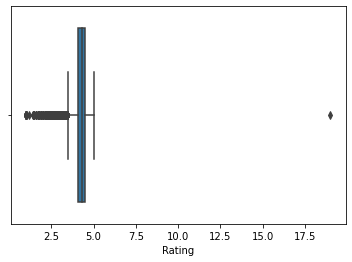

In [49]:
#Detecting an Outlier
sns.boxplot(x = df['Rating'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


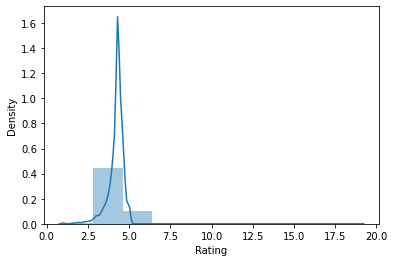

In [53]:
sns.distplot(df['Rating'], bins = 10 , kde = 'false')
plt.show()